<a href="https://colab.research.google.com/github/Dreyton/iaml/blob/main/pratica1_ML_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Framework Scikit-Learn**

[scikit-learng](https://scikit-learn.org/stable/)

# **Bases de dados do Sckiti-Learn**

[Base de dados do próprio framework](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [ ]:
#ex. iris
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

X

In [ ]:
y

In [ ]:
#visualizacao dos dados em 2-D (aula de graficos)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {0: 'r', 1: 'b', 2: 'g'} #dicionario chave:valor, chave:valor, ...

for especie in y.unique():
    tmp = X[y == especie] #selecionar quais instancias/registro sao daquela especie
    eixo.scatter(tmp['sepal length (cm)'], tmp['sepal width (cm)'],
                 color=cores[especie]) #plota os dados daquela especie

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], fontsize=20)

# **k-nn (treino, teste e avaliação)**

[Documentação do k-nn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

[Documentação das métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y=True, as_frame=True)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier()

knn.fit(Xtr, ytr) #treino

yte_pred = knn.predict(Xte) #teste

print(accuracy_score(yte, yte_pred))
print(precision_score(yte, yte_pred, average='macro'))
print(recall_score(yte, yte_pred, average='macro'))
print(f1_score(yte, yte_pred, average='macro'))
print(confusion_matrix(yte, yte_pred))

In [ ]:
#visualizacao da matriz de confusao
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(yte, yte_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [ ]:
#relatorio de classificacao

from sklearn.metrics import classification_report


dados = load_iris()

target_names = dados['target_names']

print(classification_report(yte, yte_pred, target_names=target_names))

# **Árvore de decisão (treino, teste e avaliação)**

[Documentação da árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

**Exercícios: Realizar treino/teste com a árvore de decisão na base de dados iris, avaliando o desempenho do algoritmo de acordo com acurácia, precisão, recall, f1-score e matriz de confusão.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


X, y = load_iris(return_X_y=True, as_frame=True)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=1)



**Desempenho no treino**

In [ ]:
#relatorio de classicacao
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xtr, ytr) #treino
yte_pred = model.predict(Xte)
ytr_pred = model.predict(Xtr)

dados = load_iris()

target_names = dados['target_names']

print(classification_report(ytr, ytr_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        36
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



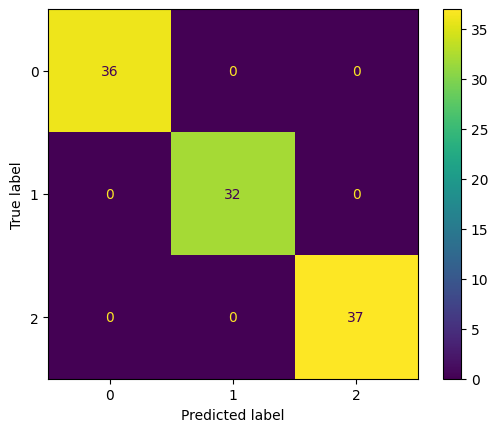

In [ ]:
#matriz de confusao
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(ytr, ytr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

**Desempenho no teste**

In [ ]:
from sklearn.metrics import classification_report

dados = load_iris()

target_names = dados['target_names']

print(classification_report(yte, yte_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



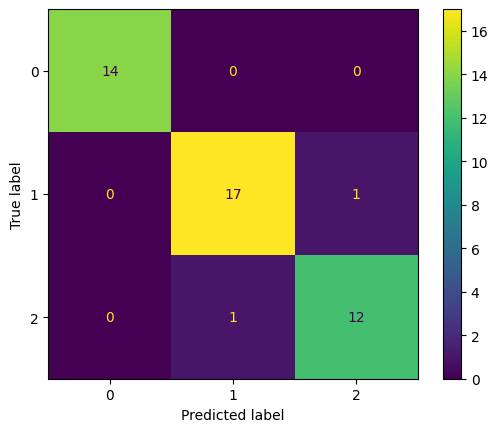

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(yte, yte_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# **Tarefa 2: SGD (treino, teste, modificação de hiper-parâmetros e avaliação)**

[Documentação SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

**Exercícios: Realizar treino/teste com o SGD na base de dados iris, avaliando o desempenho do algoritmo de acordo com acurácia, precisão, recall, f1-score e matriz de confusão. Variar alguns dos hiper-parâmetros e analisar os resultados obtidos**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#importar o classificador aqui

X, y = load_iris(return_X_y=True, as_frame=True)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=1)

#cria o classicador

#treina

#testa


**Desempenho no treino**

In [ ]:
#relatorio de classicacao


In [ ]:
#matriz de confusao


**Desempenho no teste**

In [ ]:
#relatorio de classicacao


In [ ]:
#matriz de confusao


**Desempenho no teste - Variando os parâmetros**

In [ ]:
#cria o classicador variando os parametros

#treina

#testa

In [ ]:
#relatorio de classicacao


In [ ]:
#matriz de confusao


**Conclusões**: Escrever aqui...